In [16]:
#I Putu Yoga Tunas Sugitha
#205150600111033
#Data Mining - C
#TP03

#datasource link : https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams

#Importing all library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,davies_bouldin_score

In [17]:
#retrieve data from source--> data kaggle di pindah ke github
url = 'https://raw.githubusercontent.com/yoga-sugitha/DataMining/main/exams.csv'
df = pd.read_csv(url)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [18]:
#dropping data with non numeric value 
dft = df.drop(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], axis=1)
dft.head()

,math score,reading score,writing score
0,67,67,63
1,40,59,55
2,59,60,50
3,77,78,68
4,78,73,68


In [19]:
#transform dataframe to array
X = np.array(dft)
print(X)

[[67 67 63]
 [40 59 55]
 [59 60 50]
 ...
 [32 35 41]
 [73 74 82]
 [65 60 62]]


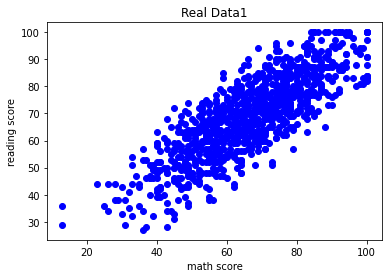

In [20]:
#scatter process to see the distribution of data between 2 tuple
plt.scatter(X[:,0],X[:,1],color = 'blue')
plt.title('Real Data1')
plt.xlabel('math score')
plt.ylabel('reading score')
plt.show()

In [21]:
#clustering
kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state=100,max_iter = 100)
kmeans.fit(X)

KMeans(max_iter=100, n_clusters=5, random_state=100)

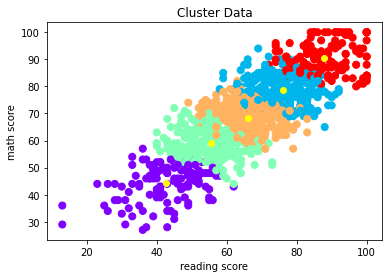

In [22]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,s=50,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = 'yellow')
plt.title('Cluster Data')
plt.xlabel('reading score')
plt.ylabel('math score')
plt.show()

In [23]:
print('k = ', kmeans.n_clusters, '--> koefisiensilhouette =', silhouette_score(X,kmeans.labels_))
print('k = ', kmeans.n_clusters, '--> koefisiensibouldin =', davies_bouldin_score(X,kmeans.labels_))

k =  5 --> koefisiensilhouette = 0.3219058565571987
k =  5 --> koefisiensibouldin = 0.971870897163402


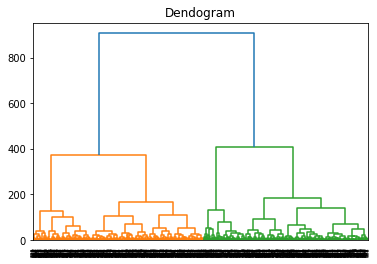

In [24]:
#dendogram graph
dendogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.show()

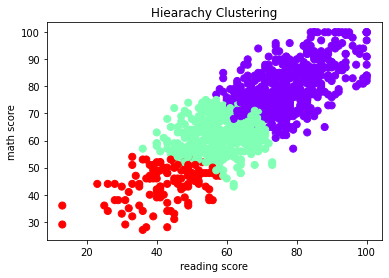

k = 3 --> koefisiensilhouette =  0.4039342079744845
k = 3 --> daviesbouldin =  0.7590395129035494


In [25]:
#Hiearachy Clustering process
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc.fit(X)

#simulating result of clustering with scatter plot
plt.scatter(X[:,0],X[:,1], c = hc.labels_, s = 50, cmap='rainbow')
plt.title('Hiearachy Clustering')
plt.xlabel('reading score')
plt.ylabel('math score')
plt.show()

print('k =', hc.n_clusters,'--> koefisiensilhouette = ', silhouette_score(X,hc.labels_))
print('k =', hc.n_clusters,'--> daviesbouldin = ', davies_bouldin_score(X,hc.labels_))
df["Hasil_cluster_kmeans"] = kmeans.labels_
df["Hasil_cluster_hirarki"] = hc.labels_
df.to_csv('tulisdata.csv')

Text(0, 0.5, 'writing score')

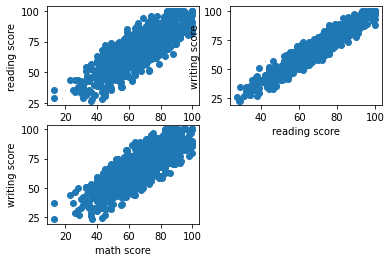

In [26]:
#subplot for reading score, math score, writing score
plt.subplot(2,2,1)
plt.scatter(X[:,0],X[:,1])
plt.xlabel('math score')
plt.ylabel('reading score')
plt.subplot(2,2,2)
plt.scatter(X[:,1],X[:,2])
plt.xlabel('reading score')
plt.ylabel('writing score')
plt.subplot(2,2,3)
plt.scatter(X[:,0],X[:,2])
plt.xlabel('math score')
plt.ylabel('writing score')

Text(0, 0.5, 'writing score')

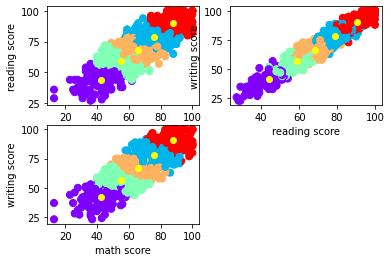

In [27]:
plt.subplot(2,2,1)
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_,s=50,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='yellow')
plt.xlabel('math score')
plt.ylabel('reading score')
plt.subplot(2,2,2)
plt.scatter(X[:,1],X[:,2],c=kmeans.labels_,s=50,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],c='yellow')

plt.xlabel('reading score')
plt.ylabel('writing score')
plt.subplot(2,2,3)
plt.scatter(X[:,0],X[:,2],c=kmeans.labels_,s=50,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],c='yellow')

plt.xlabel('math score')
plt.ylabel('writing score')